In [208]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
import psycopg2
import sys
sys.path.append('../ETL')

import config

In [209]:
# Create postgresql connection engine
db_string = f"postgresql://{config.db_user}:{config.db_password}@{config.db_hostname}/{config.db_name}"
engine = create_engine(db_string)

In [210]:
# read the data from postgresqlDB sales_order_sheet_processed 
df = pd.read_sql('select * from sales_order_Sheet_processed ',engine)

In [211]:
#code read from local file system
#df = pd.read_csv('../Data/sales_order_sheet_processed.csv')

In [212]:
df.head()

,ordernumber,sales_channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,salesteamid,customerid,storeid,productid,order_quantity,discount_applied,unit_price,unit_cost,order_total,order_discount,grand_total
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,9815.5,736.1625,9079.3375
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,11818.8,886.4100,10932.3900
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,1775.5,88.7750,1686.7250
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,18599.2,1394.9400,17204.2600
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,14579.2,1457.9200,13121.2800


In [213]:
# orderdate and grand_total columns.
sales_df  = df[['orderdate','grand_total']]
sales_df

,orderdate,grand_total
0,2018-05-31,9079.3375
1,2018-05-31,10932.3900
2,2018-05-31,1686.7250
3,2018-05-31,17204.2600
4,2018-05-31,13121.2800
...,...,...
7986,2020-12-30,216.9125
7987,2020-12-30,18254.8200
7988,2020-12-30,15302.8000
7989,2020-12-30,7718.4000


In [214]:
sales_df.dtypes

orderdate       object
grand_total    float64
dtype: object

In [215]:
sales_df['orderdate_filter']= pd.to_datetime(sales_df['orderdate'])
sales_df

C:\Users\maitr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,orderdate,grand_total,orderdate_filter
0,2018-05-31,9079.3375,2018-05-31
1,2018-05-31,10932.3900,2018-05-31
2,2018-05-31,1686.7250,2018-05-31
3,2018-05-31,17204.2600,2018-05-31
4,2018-05-31,13121.2800,2018-05-31
...,...,...,...
7986,2020-12-30,216.9125,2020-12-30
7987,2020-12-30,18254.8200,2020-12-30
7988,2020-12-30,15302.8000,2020-12-30
7989,2020-12-30,7718.4000,2020-12-30


In [216]:
# filter out incomplete dataset 
#sales_df = sales_df[(sales_df.orderdate != '2018-05-31')]
sales_df['orderdate_filter']= pd.to_datetime(sales_df['orderdate_filter'])

sales_df = sales_df[(sales_df['orderdate_filter'].dt.date.astype(str) != '2018-05-31')]

# rename the column grand total to sales better readablity
sales_df=sales_df.rename(columns = {'grand_total': 'sales'})
sales_df


C:\Users\maitr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,orderdate,sales,orderdate_filter
8,2018-06-01,10862.0400,2018-06-01
9,2018-06-01,14868.6400,2018-06-01
10,2018-06-01,1085.4000,2018-06-01
11,2018-06-01,26681.0750,2018-06-01
12,2018-06-01,4996.5250,2018-06-01
...,...,...,...
7986,2020-12-30,216.9125,2020-12-30
7987,2020-12-30,18254.8200,2020-12-30
7988,2020-12-30,15302.8000,2020-12-30
7989,2020-12-30,7718.4000,2020-12-30


In [217]:
#sales_df['month'] = sales_df['orderdate']

In [218]:
sales_df= sales_df.drop('orderdate_filter',1)
sales_df

C:\Users\maitr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,orderdate,sales
8,2018-06-01,10862.0400
9,2018-06-01,14868.6400
10,2018-06-01,1085.4000
11,2018-06-01,26681.0750
12,2018-06-01,4996.5250
...,...,...
7986,2020-12-30,216.9125
7987,2020-12-30,18254.8200
7988,2020-12-30,15302.8000
7989,2020-12-30,7718.4000


In [219]:
#summarize the data by Month
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.orderdate = monthly_data.orderdate.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('orderdate')['sales'].sum().reset_index()
    monthly_data.orderdate = pd.to_datetime(monthly_data.orderdate)
    monthly_data.sales = monthly_data['sales'].round(0)
    
    return monthly_data

In [220]:
# monthly df by sales
monthly_df = monthly_sales(sales_df)
monthly_df.head()

,orderdate,sales
0,2018-06-01,2180210.0
1,2018-07-01,2396751.0
2,2018-08-01,2563354.0
3,2018-09-01,2455741.0
4,2018-10-01,2062014.0


In [221]:
monthly_df.set_index('orderdate',inplace=True)
monthly_df.head()

,sales
orderdate,
2018-06-01,2180210.0
2018-07-01,2396751.0
2018-08-01,2563354.0
2018-09-01,2455741.0
2018-10-01,2062014.0


In [222]:
# descibe the data
monthly_df.describe()

,sales
count,3.100000e+01
mean,2.357218e+06
std,2.498793e+05
min,1.936393e+06
25%,2.181968e+06
50%,2.396751e+06
75%,2.479200e+06
max,2.811011e+06


<AxesSubplot:xlabel='orderdate'>

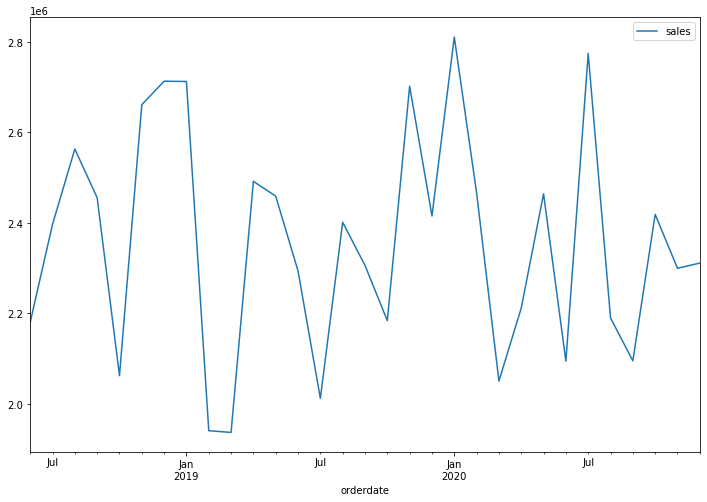

In [223]:
# data inspect
monthly_df.columns = ['sales']
monthly_df.plot(figsize=(12,8))

In [224]:

# taking previous 3 months sales value 
monthly_df['Sale_LastMonth']=monthly_df['sales'].shift(+1)
monthly_df['Sale_2Monthsback']=monthly_df['sales'].shift(+2)
monthly_df['Sale_3Monthsback']=monthly_df['sales'].shift(+3)
monthly_df

,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
orderdate,,,,
2018-06-01,2180210.0,NaN,NaN,NaN
2018-07-01,2396751.0,2180210.0,NaN,NaN
2018-08-01,2563354.0,2396751.0,2180210.0,NaN
2018-09-01,2455741.0,2563354.0,2396751.0,2180210.0
2018-10-01,2062014.0,2455741.0,2563354.0,2396751.0
2018-11-01,2661494.0,2062014.0,2455741.0,2563354.0
2018-12-01,2713434.0,2661494.0,2062014.0,2455741.0
2019-01-01,2712821.0,2713434.0,2661494.0,2062014.0
2019-02-01,1940231.0,2712821.0,2713434.0,2661494.0


In [225]:
# dropna monthly df.
monthly_df= monthly_df.dropna()
monthly_df.head()


,sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
orderdate,,,,
2018-09-01,2455741.0,2563354.0,2396751.0,2180210.0
2018-10-01,2062014.0,2455741.0,2563354.0,2396751.0
2018-11-01,2661494.0,2062014.0,2455741.0,2563354.0
2018-12-01,2713434.0,2661494.0,2062014.0,2455741.0
2019-01-01,2712821.0,2713434.0,2661494.0,2062014.0


# LinearRegression

In [226]:
# linearregression model
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [227]:
import numpy as np
x1,x2,x3,y=monthly_df['Sale_LastMonth'],monthly_df['Sale_2Monthsback'],monthly_df['Sale_3Monthsback'],monthly_df['sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)


[[2563354. 2396751. 2180210.]
 [2455741. 2563354. 2396751.]
 [2062014. 2455741. 2563354.]
 [2661494. 2062014. 2455741.]
 [2713434. 2661494. 2062014.]
 [2712821. 2713434. 2661494.]
 [1940231. 2712821. 2713434.]
 [1936393. 1940231. 2712821.]
 [2491885. 1936393. 1940231.]
 [2459158. 2491885. 1936393.]
 [2293528. 2459158. 2491885.]
 [2011771. 2293528. 2459158.]
 [2401218. 2011771. 2293528.]
 [2305870. 2401218. 2011771.]
 [2183725. 2305870. 2401218.]
 [2702456. 2183725. 2305870.]
 [2415240. 2702456. 2183725.]
 [2811011. 2415240. 2702456.]
 [2466514. 2811011. 2415240.]
 [2050076. 2466514. 2811011.]
 [2211514. 2050076. 2466514.]
 [2464346. 2211514. 2050076.]
 [2093988. 2464346. 2211514.]
 [2775015. 2093988. 2464346.]
 [2189760. 2775015. 2093988.]
 [2094788. 2189760. 2775015.]
 [2418754. 2094788. 2189760.]
 [2299602. 2418754. 2094788.]]


In [228]:
# train the dataset
X_train,X_test,y_train,y_test=final_x[:-6],final_x[-6:],y[:-6],y[-6:]

In [229]:
# fit the model

lin_model.fit(X_train,y_train)

LinearRegression()

In [230]:
# lilear model coeficient
lin_model.coef_

array([[ 0.07616224, -0.31430091, -0.1239525 ]])

In [231]:
# linear model intercept.
lin_model.intercept_

array([3216058.47696452])

In [232]:
import seaborn as sns

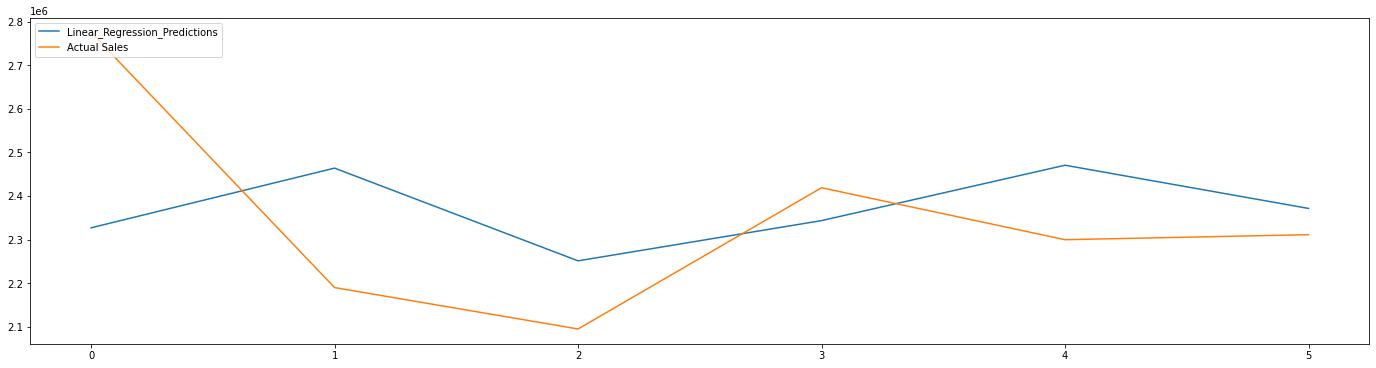

In [233]:
# linear regression prediction.
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [234]:
#sns.pairplot(monthly_df,x_vars=['orderdate'],y_vars='sales',size=7,aspect=0.7)

In [235]:
# Calculated the balanced accuracy score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [236]:
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [237]:
#print('RMSE for Linear Regression Model is:',rmse_lr)

In [238]:
print('Mean Absolute Error (MAE):', mean_absolute_error(lin_pred,y_test))
print('Mean Squared Error (MSE):', mean_squared_error(lin_pred,y_test))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(lin_pred,y_test)))
mape = np.mean(np.abs((lin_pred - y_test) / np.abs(lin_pred)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 197492.8501748511
Mean Squared Error (MSE): 56477347663.681496
Root Mean Squared Error (RMSE): 237649.6321555779
Mean Absolute Percentage Error (MAPE): 8.33
Accuracy: 91.67


# RandomForestRegression

In [239]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,max_features=3, random_state=0)

In [240]:
model.fit(X_train,y_train)

C:\Users\maitr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_features=3, n_estimators=10, random_state=0)

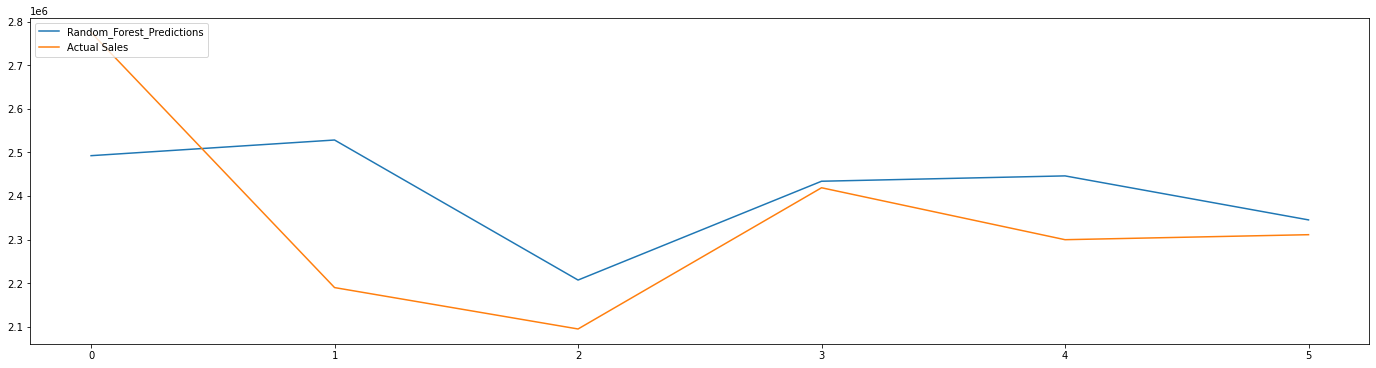

In [241]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,6)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [242]:
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('RMSE for Random Forest Model is:',rmse_rf)

RMSE for Random Forest Model is: 195739.91049649697


In [243]:
y_pred = model.predict(X_test)


In [244]:
print('Mean Absolute Error (MAE):', mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE):', mean_squared_error(pred,y_test))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(pred,y_test)))
mape = np.mean(np.abs((pred - y_test) / np.abs(pred)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 154779.7333333333
Mean Squared Error (MSE): 38314112561.17665
Root Mean Squared Error (RMSE): 195739.91049649697
Mean Absolute Percentage Error (MAPE): 8.67
Accuracy: 91.33
